In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\KRANTHI\Documents\Internship Grip\datasets\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.duplicated().sum()


17

In [8]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True)
df.duplicated().sum()

0

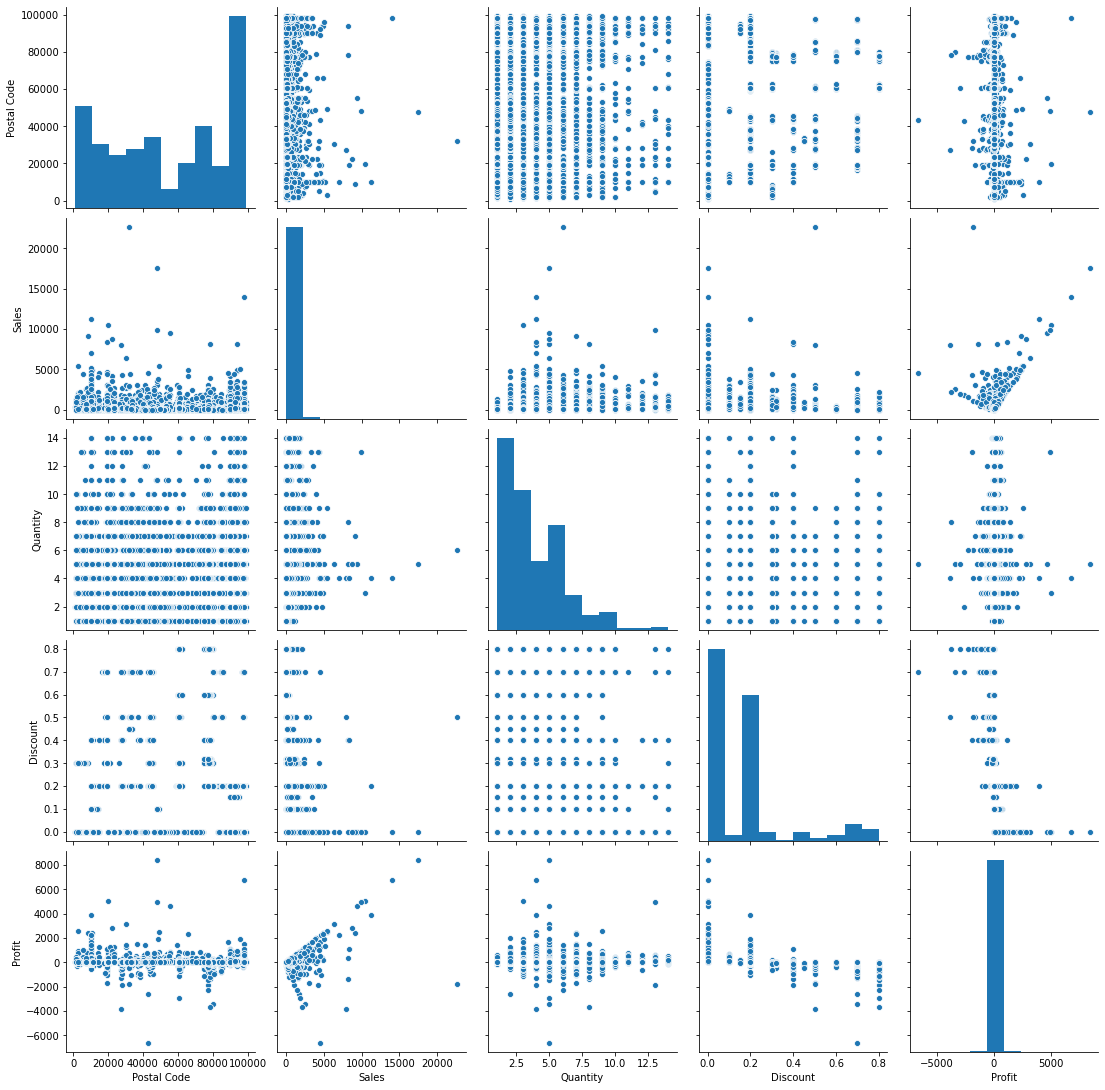

In [10]:
sns.pairplot(df,height=3);

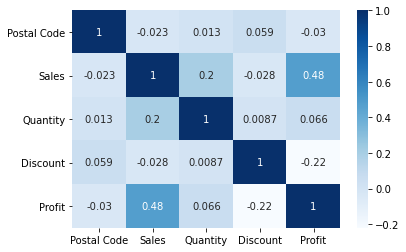

In [15]:
corr = df.corr()
sns.heatmap(corr,cmap = "Blues", annot = True)
plt.show()

Text(0.5, 0, 'Profit')

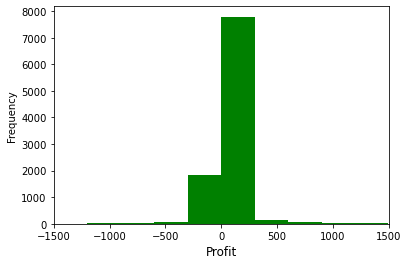

In [19]:
df['Profit'].plot.hist(bins=50,color="green")
plt.xlim(-1500,1500)
plt.xlabel('Profit', fontsize=12)


Text(0.5, 0, 'Sales')

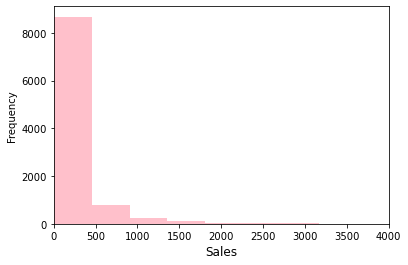

In [20]:
df['Sales'].plot.hist(bins=50,color="pink")
plt.xlim(0,4000)
plt.xlabel('Sales', fontsize=12)

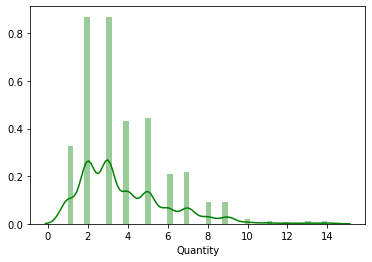

In [21]:
#visualizing Quantity
sns.distplot(df['Quantity'], color= 'green')
plt.show()

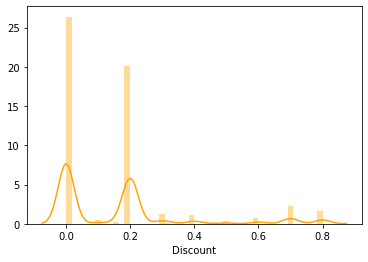

In [22]:

#visualizing duscount
sns.distplot(df['Discount'], color= 'orange')
plt.show()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


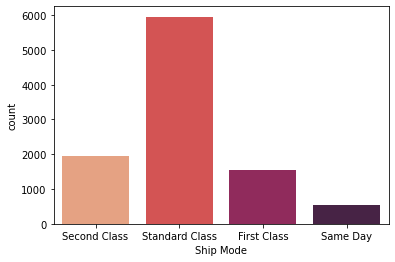

In [23]:
print(df['Ship Mode'].value_counts())
sns.countplot(x = df["Ship Mode"],palette="rocket_r")
plt.show()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


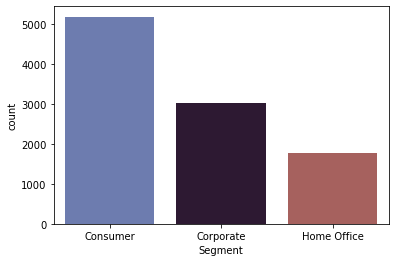

In [24]:
print(df['Segment'].value_counts())
sns.countplot(x = df['Segment'],palette="twilight")
plt.show()

United States    9977
Name: Country, dtype: int64


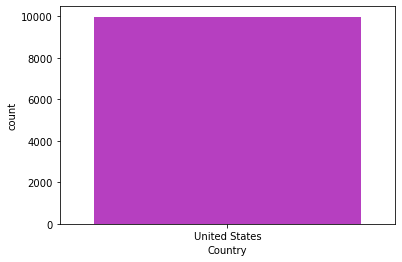

In [25]:

#visualizing Country
print(df['Country'].value_counts())
sns.countplot(x = df['Country'],palette="gnuplot2")
plt.show()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


Text(0.5, 1.0, 'Percentage of sales in diff Regions of USA')

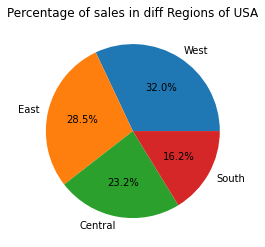

In [26]:
theme = plt.get_cmap('hsv')
print(df['Region'].value_counts())
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of sales in diff Regions of USA')

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


Text(0.5, 1.0, 'Percentage of sales for different categories')

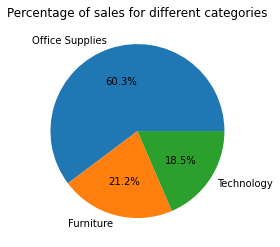

In [27]:
#Visualizing Category
print(df['Category'].value_counts())
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of sales for different categories')

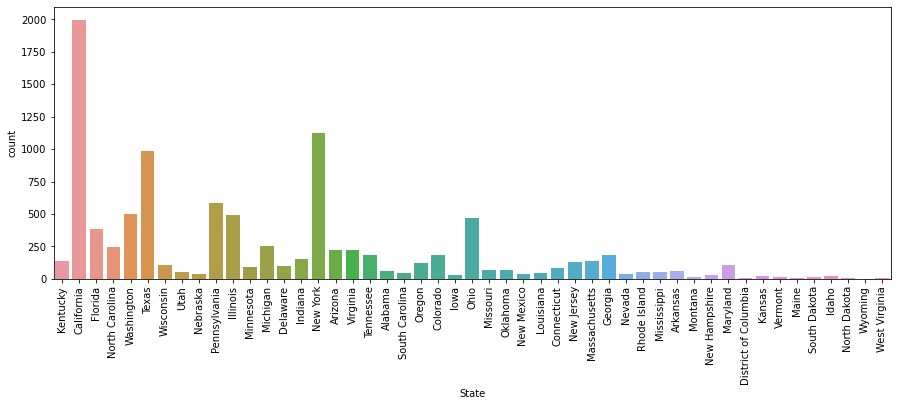

In [28]:
#Visualizing State
plt.figure(figsize=(15,5))
sns.countplot(x = df.State)
plt.xticks(rotation = 90)
plt.show()


New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Deer Park          1
Port Orange        1
Ontario            1
Vacaville          1
Abilene            1
Name: City, Length: 531, dtype: int64


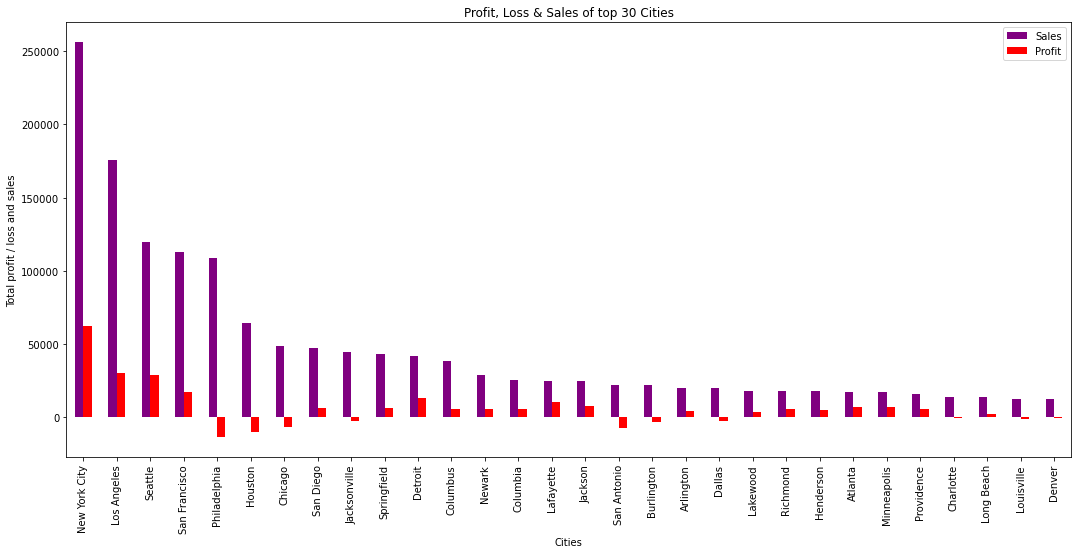

In [29]:

#City wise analysis of Profits and sale
print(df['City'].value_counts())
City = df.groupby("City")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False)
City[:30].plot(kind = "bar", color = ["purple", "red"],figsize= (18,8))
plt.title("Profit, Loss & Sales of top 30 Cities")
plt.xlabel("Cities")
plt.ylabel("Total profit / loss and sales")
plt.show()

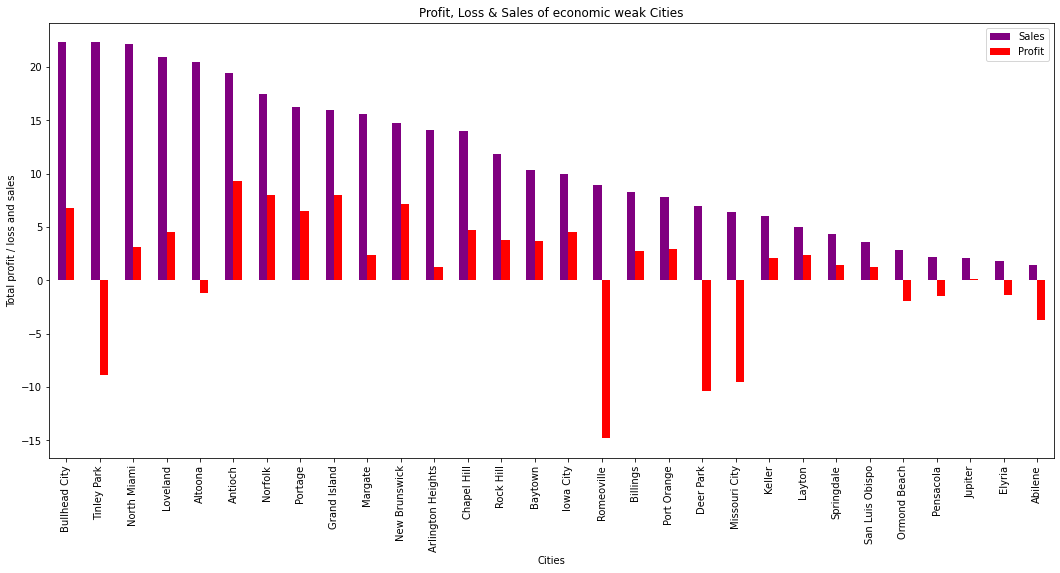

In [30]:
#Profit, Loss & Sales of economic weak Cities
City[-30:].plot(kind = "bar", color = ["purple", "red"],figsize= (18,8))
plt.title("Profit, Loss & Sales of economic weak Cities")
plt.xlabel("Cities")
plt.ylabel("Total profit / loss and sales")
plt.show()

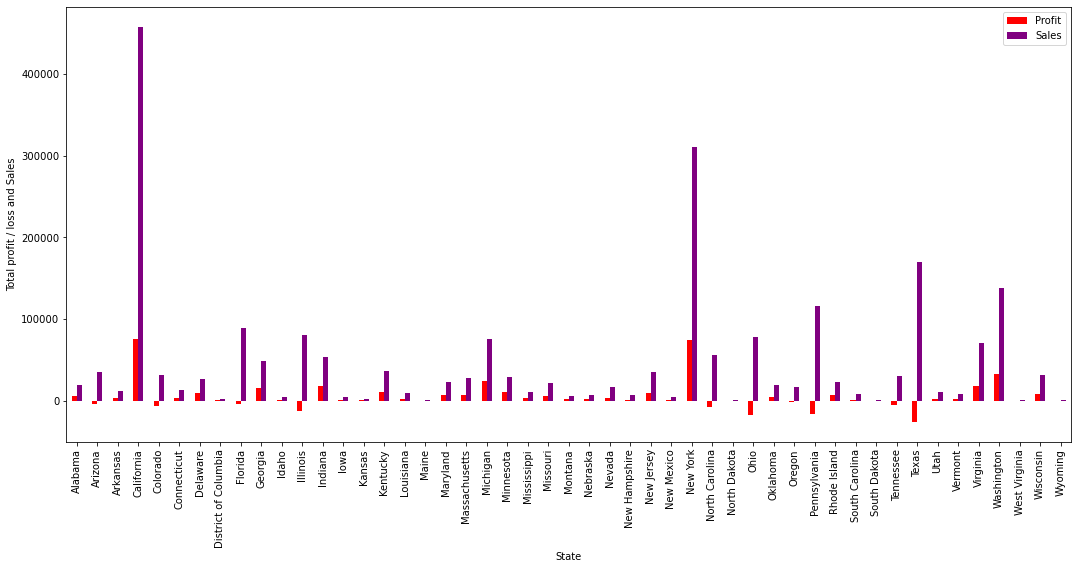

In [31]:
#State wise analysis of Profit and Sales:
df.groupby('State')[['Profit', 'Sales']].sum().plot.bar(color = ["red", "purple"],figsize= (18,8))
plt.ylabel("Total profit / loss and Sales")
plt.show()


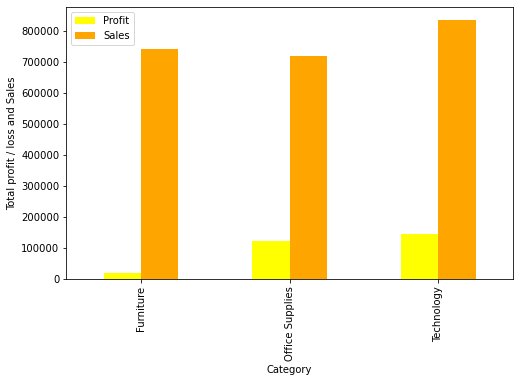

In [32]:

#Category wise analysis of Profit and Sales
df.groupby('Category')[['Profit', 'Sales']].sum().plot.bar(color = ["yellow", "orange"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

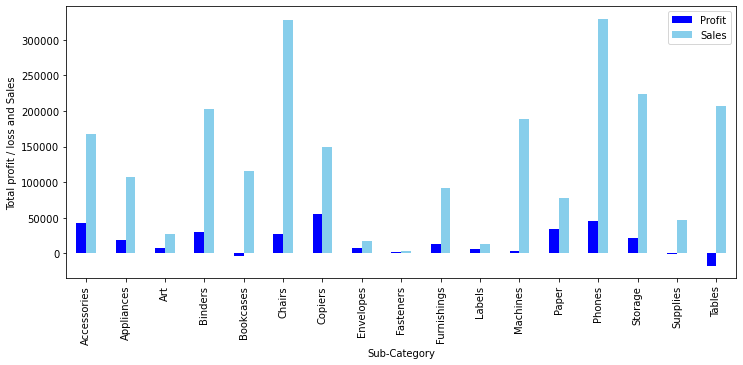

In [33]:
#Sub-Category wise analysis of Profit and Sales
df.groupby('Sub-Category')[['Profit', 'Sales']].sum().plot.bar(color = ["blue", "skyblue"],figsize= (12,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()


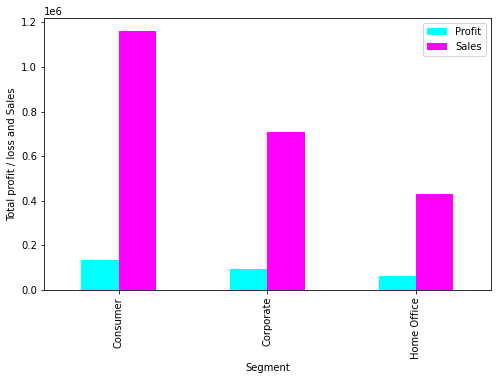

In [34]:

#Segment wise analysis of profit and sales
df.groupby('Segment')[['Profit', 'Sales']].sum().plot.bar(color = ["cyan", "magenta"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

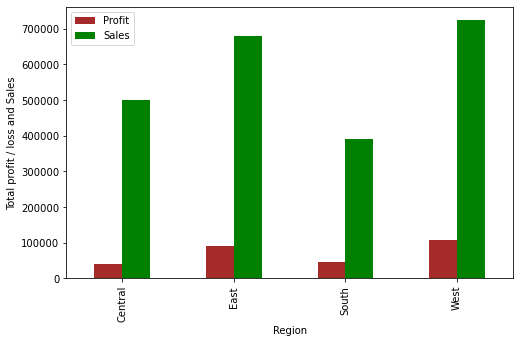

In [35]:

#Region wise analysis of profit and sales
df.groupby('Region')[['Profit', 'Sales']].sum().plot.bar(color = ["brown", "green"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

Conclusion:
-Same day shipping mode should be improved

-Sales in south region should be increased

-Technology is the least selling category

-All the subcategories should be given equal attention for increasing sales.

-We should expand in all the states of US

-Sales should be increased in southern regions as presently it has the lowest sales.

-Furniture supplies have low profit relative to its sale. Profit should be maximised in this category.

-States like Ohio and Texas are facing high losses, improvement should be made in such states.

-Profit and Sales are related to each other but the proportion is not very uniforn.Hence we should to work on both sales and profit seperately to increase them.